# <center>CSE 258 Fall 2017 - Homework 2<center>
- - -

## <center>Xiangyuan Ren<center>
### <center> Department of Electrical and Computer Engineering <center>
### <center>Email: xir010@eng.ucsd.edu <center>


## Classifier evaluation 
### Answers Briefly (*Details shown in following pages*)
* 
#### Q1:
* Accuracy on the validation set: 0.71842563148737026
* Accuracy on the test set: 0.72004559908801824 
#### Q2:
* Using new features
* Accuracy on the validation set: 0.62590748185036305
* Accuracy on the test set: 0.61960760784784308
#### Q3:
* #positives: 10254
* #true negatives: 73
* #false positives: 6243
* #false negatives: 97
* #Balanced Error Rate: 0.498906563595
#### Q4:
* Balanced Error Rate on the train set: 0.440505888296
* Balanced Error Rate on the validation set: 0.444763207313
* Balanced Error Rate on the test set: 0.433740167554
#### Q5:
* The best model: **$\lambda$** == 100
* Balanced Error Rate on the train set: 0.440827067227
* Balanced Error Rate on the validation set: 0.444881466162
* Balanced Error Rate on the test set: 0.432677468298


In [82]:
import numpy
import scipy.optimize
import random
from sklearn.decomposition import PCA
from collections import defaultdict
from math import exp
from math import log
import string
def ParseDataFromFile(f):
    for l in open(f):
        yield eval(l)
data=list(ParseDataFromFile("beer_50000.json"))

---
## Qestion 1: 
###           Split the data into training, validation, and test sets, via 1/3, 1/3, 1/3 splits. After training on the training set, report the accuracy of the classifier on the validation and test sets
* First, shuffle the data.
* feature(datum): to build the feature vector like θ0 + θ1 × ‘review/taste’ + θ2 × ‘review/appearance’ + θ3 × ‘review/aroma’+θ4 × ‘review/palate’ + θ5 × ‘review/overall
* inner(), sigmoid(), f(), frime(), train(), performance(): to use logistic regression to train and test data.

In [83]:
numpy.random.shuffle(data)            # Shuffle Data Here

In [84]:
def feature(datum):
    feat = [1, datum['review/taste'], datum['review/appearance'], datum['review/aroma'], 
            datum['review/palate'], datum['review/overall']]
    return feat
#

X = [feature(d) for d in data]
y = [d['beer/ABV']>=6.5 for d in data]


In [85]:
def inner(x,y):
    return sum([x[i]*y[i] for i in range(len(x))])

def sigmoid(x):
    return 1.0 / (1 + exp(-x))

# NEGATIVE Log-likelihood
def f(theta, X, y, lam):
    loglikelihood = 0
    for i in range(len(X)):
        logit = inner(X[i], theta)
        loglikelihood -= log(1 + exp(-logit))
        if not y[i]:
            loglikelihood -= logit
    for k in range(len(theta)):
        loglikelihood -= lam * theta[k]*theta[k]
  # for debugging
  # print("ll =" + str(loglikelihood))
    return -loglikelihood
# NEGATIVE Derivative of log-likelihood
def fprime(theta, X, y, lam):
    dl = [0]*len(theta)
    for i in range(len(X)):
        logit = inner(X[i], theta)
        for k in range(len(theta)):
            dl[k] += X[i][k] * (1 - sigmoid(logit))
            if not y[i]:
                dl[k] -= X[i][k]
    for k in range(len(theta)):
        dl[k] -= lam*2*theta[k]
    return numpy.array([-x for x in dl])

def train(lam):
    theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X[0]), fprime, pgtol = 10, args = (X_train, y_train, lam))
    return theta
def performance(theta):
    
#     scores = [inner(theta,x) for x in X]
#     predictions = [s > 0 for s in scores]
#     correct = [(a==b) for (a,b) in zip(predictions,y_train)]
#     acc = sum(correct) * 1.0 / len(correct)
#     return acc
    scores_train = [inner(theta,x) for x in X_train]
    scores_validate = [inner(theta,x) for x in X_validate]
    scores_test = [inner(theta,x) for x in X_test]

    predictions_train = [s > 0 for s in scores_train]
    predictions_validate = [s >0 for s in scores_validate]
    predictions_test = [s > 0 for s in scores_test]

    correct_train = [(a==b) for (a,b) in zip(predictions_train,y_train)]
    correct_validate = [(a==b) for (a,b) in zip(predictions_validate,y_validate)]
    correct_test = [(a==b) for (a,b) in zip(predictions_test,y_test)]
  
    acc_train = sum(correct_train) * 1.0 / len(correct_train)
    acc_validate = sum(correct_validate) * 1.0 / len(correct_validate)
    acc_test = sum(correct_test) * 1.0 / len(correct_test)
    return acc_train, acc_validate, acc_test

In [86]:
X_train = X[:int(len(X)/3)]
y_train = y[:int(len(y)/3)]
X_validate = X[int(len(X)/3):int(2*len(X)/3)]
y_validate = y[int(len(y)/3):int(2*len(y)/3)]
X_test = X[int(2*len(X)/3):]
y_test = y[int(2*len(X)/3):]

In [87]:
lam = 1.0

theta = train(lam)
print "theta = ",theta
acc = performance(theta)
print("lambda = " + str(lam) + ":\taccuracy=" + str(acc))

theta =  [-6.01898262  0.78253351  0.41889885  0.79923473  0.63163875 -0.93382104]
lambda = 1.0:	accuracy=(0.71786871474858993, 0.71842563148737026, 0.72004559908801824)


#### Answer Q1:
* ( lambda is: 1.0)
* ( theta is: [-6.01898262  0.78253351  0.41889885  0.79923473  0.63163875 -0.93382104] )
* ( Accuracy on the training set: 0.71786871474858993 )
* Accuracy on the validation set: 0.71842563148737026
* Accuracy on the test set:  0.72004559908801824

* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 





---


### Q2:
### p(positive label) = σ(θ0 + θ1 × #‘lactic’ + θ2 × #‘tart’...),
* the feature function should be changed first

```
reviewcontent=datum['review/text'].strip().translate(None, string.punctuation).lower().split()

```

* Then we re-run the code again

In [88]:
def feature(datum):
    feat=[1]*11
    reviewcontent=datum['review/text'].strip().translate(None, string.punctuation).lower().split()
    featureword=["lactic","tart","sour","citric","sweet","acid","hop","fruit","salt","spicy"]
    for i in range(1,11):
        feat[i]=sum([featureword[i-1]==j for j in reviewcontent])
    return feat

In [89]:
def testlambda(lam):
    theta = train(lam)
    print "theta = ",theta
    acc = performance(theta)
    print("lambda = " + str(lam) + ":\taccuracy=" + str(acc))
    return theta
    

In [90]:
X = [feature(d) for d in data]
y = [d['beer/ABV']>=6.5 for d in data]
X_train = X[:int(len(X)/3)]
y_train = y[:int(len(y)/3)]
X_validate = X[int(len(X)/3):int(2*len(X)/3)]
y_validate = y[int(len(y)/3):int(2*len(y)/3)]
X_test = X[int(2*len(X)/3):]
y_test = y[int(2*len(X)/3):]

lam = 1.0

theta=testlambda(lam)

theta =  [ 0.34042945  0.05371304  0.48523357 -0.27661991 -0.11306548  0.23566173
  0.03792651 -0.01502086  0.44948817 -0.08324426 -0.18300371]
lambda = 1.0:	accuracy=(0.62246489859594378, 0.62590748185036305, 0.61960760784784308)


* 
* 
* 
* 
#### Answer Q2:
* ( lambda is: 1.0)
* ( theta is: [ 0.34042945  0.05371304  0.48523357 -0.27661991 -0.11306548  0.23566173
  0.03792651 -0.01502086  0.44948817 -0.08324426 -0.18300371] )
* ( Accuracy on the training set: 0.62246489859594378 )
* Accuracy on the validation set: 0.62590748185036305
* Accuracy on the training set:  0.61960760784784308
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 

---
### Q3:
#### Report the number of true positives, true negatives, false positives, false negatives, and the Balanced Error Rate of the classifier on the test set
* First design the function to test TP/FP/FN/TN/FPR/FNR/BER
* Then run testerror() on the test set

In [91]:
def testerror(X_test,y_test):
    scores_test = [inner(theta,x) for x in X_test]
    predictions_test = [s > 0 for s in scores_test]
    TP=sum([a and b for (a,b) in zip(predictions_test,y_test)])
    FP=sum([a and not b for (a,b) in zip(predictions_test,y_test)])
    FN=sum([not a and b for (a,b) in zip(predictions_test,y_test)])
    TN=sum([not a and not b for (a,b) in zip(predictions_test,y_test)])
    FPR=FP/float(FP+TN)
    FNR=FN/float(FN+TP)
    BER=(FPR+FNR)/2
    print "TP,FP,FN,TN:\t",TP,FP,FN,TN
    print "FPR,FNR:\t",FPR,FNR
    print "BER:\t\t",BER

In [92]:
testerror(X_test,y_test)

TP,FP,FN,TN:	10254 6243 97 73
FPR,FNR:	0.988442051932 0.00937107525843
BER:		0.498906563595


#### Answer Q3:
* #positives: 10254
* #true negatives: 73
* #false positives: 6243
* #false negatives: 97
* #Balanced Error Rate: 0.498906563595
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 

---
### Q4:
#### Adjust the gradient ascent code provided such that the classifier would be approximately ‘balanced’ between the positive and negative classes
* First change the log-likelihood based on its label (add weights to each label)
```
if y[i]:
            loglikelihood -=N/float(2*Y1)* log(1 + exp(-logit))
        if not y[i]:
            loglikelihood -= N/float(2*Y0)*(log(1+exp(-logit))+logit)
```
* Then change the frime accordingly
```
if y[i]:
                dl[k] +=N/float(2*Y1)* X[i][k] * (1 - sigmoid(logit))
            if not y[i]:
                dl[k] +=N/float(2*Y0)* X[i][k] * (1 - sigmoid(logit))
                dl[k] -=N/float(2*Y0)* X[i][k]
```
* Report the Balanced Error Rate (on the train/validation/test sets) for the new classifier

In [93]:
# NEGATIVE Log-likelihood
def f(theta, X, y, lam):
    N=len(y)
    Y1=sum(y)
    Y0=N-Y1
    loglikelihood = 0
    for i in range(len(X)):
        logit = inner(X[i], theta)
        if y[i]:
            loglikelihood -=N/float(2*Y1)* log(1 + exp(-logit))
        if not y[i]:
            loglikelihood -= N/float(2*Y0)*(log(1+exp(-logit))+logit)
    for k in range(len(theta)):
        loglikelihood -= lam * theta[k]*theta[k]
  # for debugging
  # print("ll =" + str(loglikelihood))
    return -loglikelihood

def fprime(theta, X, y, lam):
    N=len(y)
    Y1=sum(y)
    Y0=N-Y1
    dl = [0]*len(theta)
    for i in range(len(X)):
        logit = inner(X[i], theta)
        for k in range(len(theta)):
            if y[i]:
                dl[k] +=N/float(2*Y1)* X[i][k] * (1 - sigmoid(logit))
            if not y[i]:
                dl[k] +=N/float(2*Y0)* X[i][k] * (1 - sigmoid(logit))
                dl[k] -=N/float(2*Y0)* X[i][k]
    for k in range(len(theta)):
        dl[k] -= lam*2*theta[k]
    return numpy.array([-x for x in dl])
def train(lam):
    theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X[0]), fprime, pgtol = 10, args = (X_train, y_train, lam))
    return theta

In [94]:
lam = 1.0

theta=testlambda(lam)
# theta = train(lam)
# acc = performance(theta)
# print("lambda = " + str(lam) + ":\taccuracy=" + str(acc))

theta =  [-0.15741912  0.06659128  0.52613262 -0.26389162 -0.13014552  0.23019588
  0.04661892 -0.01709154  0.43591598 -0.10288322 -0.16390937]
lambda = 1.0:	accuracy=(0.53288131525261007, 0.52732945341093174, 0.53986920261594773)


In [95]:
print "TRAIN:"
testerror(X_train,y_train)

TRAIN:
TP,FP,FN,TN:	4675 2088 5697 4206
FPR,FNR:	0.331744518589 0.549267258002
BER:		0.440505888296


In [96]:
print "VALIDATE:"
testerror(X_validate,y_validate)

VALIDATE:
TP,FP,FN,TN:	4650 2082 5796 4139
FPR,FNR:	0.334672882173 0.554853532453
BER:		0.444763207313


In [97]:
print "TEST:"
testerror(X_test,y_test)

TEST:
TP,FP,FN,TN:	4733 2051 5618 4265
FPR,FNR:	0.324730842305 0.542749492803
BER:		0.433740167554


#### Answer Q4:
* Balanced Error Rate on the train set: 0.440505888296
* Balanced Error Rate on the validation set: 0.444763207313
* Balanced Error Rate on the test set: 0.433740167554
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 


---
### Q5:
####  Implement a training/validation/test pipeline so that you can select the best model based on its perfor- mance on the validation set.
* Run logistic-regressor on all the $\lambda$
* Pick the best $\lambda$, which has best performance

In [98]:
for lam in [0,0.01,0.1,1,100]:
    theta=testlambda(lam)
    print

theta =  [-0.15783973  0.06778283  0.53295583 -0.26693821 -0.13215964  0.23036407
  0.04743829 -0.01692134  0.43740362 -0.10470616 -0.16447784]
lambda = 0:	accuracy=(0.53282131285251411, 0.52738945221095579, 0.53986920261594773)

theta =  [-0.1578355   0.06777073  0.53288658 -0.26690732 -0.13213921  0.23036239
  0.04742998 -0.01692307  0.43738865 -0.10468766 -0.16447212]
lambda = 0.01:	accuracy=(0.53282131285251411, 0.52738945221095579, 0.53986920261594773)

theta =  [-0.15779741  0.06766208  0.53226426 -0.2666297  -0.13195561  0.23034727
  0.04735527 -0.01693856  0.43725396 -0.10452145 -0.16442071]
lambda = 0.1:	accuracy=(0.53282131285251411, 0.52738945221095579, 0.53986920261594773)

theta =  [-0.15741912  0.06659128  0.52613262 -0.26389162 -0.13014552  0.23019588
  0.04661892 -0.01709154  0.43591598 -0.10288322 -0.16390937]
lambda = 1:	accuracy=(0.53288131525261007, 0.52732945341093174, 0.53986920261594773)

theta =  [-0.12910281  0.02039949  0.24784724 -0.12986642 -0.04861796  0.21

---
#### When lambda=100, I have best performance on  validation set, which is 0.52762944741105178. So, I pick it as my best model


In [100]:
theta=testlambda(100)
print "TRAIN:"
testerror(X_train,y_train)
print "VALIDATE:"
testerror(X_validate,y_validate)
print "TEST:"
testerror(X_test,y_test)

theta =  [-0.12910281  0.02039949  0.24784724 -0.12986642 -0.04861796  0.21283683
  0.01472938 -0.02318686  0.34009174 -0.03182648 -0.12248925]
lambda = 100:	accuracy=(0.53318132725309009, 0.52762944741105178, 0.54118917621647566)
TRAIN:
TP,FP,FN,TN:	4698 2106 5674 4188
FPR,FNR:	0.334604385129 0.547049749325
BER:		0.440827067227
VALIDATE:
TP,FP,FN,TN:	4666 2093 5780 4128
FPR,FNR:	0.336441086642 0.553321845683
BER:		0.444881466162
TEST:
TP,FP,FN,TN:	4755 2051 5596 4265
FPR,FNR:	0.324730842305 0.54062409429
BER:		0.432677468298


#### Q5:
* The best model: **$\lambda$** == 100
* Balanced Error Rate on the train set: 0.440827067227
* Balanced Error Rate on the validation set: 0.444881466162
* Balanced Error Rate on the test set: 0.432677468298

* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 

---
## Part II: Dimensionality reduction
### Q6:
#### Find and report the PCA components 
* First get the 10-d data:
```
X10d=[x[1:] for x in X]
```
* Then report PCA for 1-10components

In [30]:
X10d=[x[1:] for x in X]

In [31]:
X10d[0],X[0]

([0, 0, 0, 0, 0, 0, 3, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0])

In [108]:
for i in range(1,4+1):
    pca = PCA(n_components=i)
    pca.fit(X10d)
    print "When n_components=",i,'\n',pca.components_,'\n'


When n_components= 1 
[[  3.84781897e-04   2.93550360e-02   9.41570014e-03   3.70747587e-03
    9.76398248e-01  -4.53936670e-05   1.95730560e-01   8.29094610e-02
    2.87235246e-05   2.23105359e-02]] 

When n_components= 2 
[[  3.84781897e-04   2.93550360e-02   9.41570014e-03   3.70747587e-03
    9.76398248e-01  -4.53936670e-05   1.95730560e-01   8.29094610e-02
    2.87235246e-05   2.23105359e-02]
 [ -8.73841023e-04  -2.12881276e-02  -1.52948443e-02   1.62711131e-02
   -1.96510401e-01   3.68488368e-04   9.79233491e-01   5.07531808e-04
    1.50338567e-04   3.91457090e-02]] 

When n_components= 3 
[[  3.84781897e-04   2.93550360e-02   9.41570014e-03   3.70747587e-03
    9.76398248e-01  -4.53936670e-05   1.95730560e-01   8.29094610e-02
    2.87235246e-05   2.23105359e-02]
 [ -8.73841023e-04  -2.12881276e-02  -1.52948443e-02   1.62711131e-02
   -1.96510401e-01   3.68488368e-04   9.79233491e-01   5.07531808e-04
    1.50338567e-04   3.91457090e-02]
 [  1.07750032e-03   1.27386243e-01   7.545

In [110]:
for i in range(5,7+1):
    pca = PCA(n_components=i)
    pca.fit(X10d)
    print "When n_components=",i,'\n',pca.components_,'\n'


When n_components= 5 
[[  3.84781897e-04   2.93550360e-02   9.41570014e-03   3.70747587e-03
    9.76398248e-01  -4.53936670e-05   1.95730560e-01   8.29094610e-02
    2.87235246e-05   2.23105359e-02]
 [ -8.73841023e-04  -2.12881276e-02  -1.52948443e-02   1.62711131e-02
   -1.96510401e-01   3.68488368e-04   9.79233491e-01   5.07531808e-04
    1.50338567e-04   3.91457090e-02]
 [  1.07750032e-03   1.27386243e-01   7.54590139e-02   2.78797250e-03
   -8.54409326e-02   1.01260929e-03  -1.36862786e-02   9.85179240e-01
    4.48334945e-04  -1.70882783e-03]
 [ -4.51179020e-04   7.82751883e-03   7.28227279e-03   1.46779738e-02
   -1.44595393e-02  -3.72728740e-04  -4.27895653e-02  -1.72687872e-03
    7.30775673e-04   9.98812481e-01]
 [  1.39047801e-02   6.11500916e-01   7.77931329e-01   1.13638384e-02
   -1.82411489e-02   6.37557442e-03   2.20844753e-02  -1.40001081e-01
    1.37120014e-03  -1.01834248e-02]] 

When n_components= 6 
[[  3.84781897e-04   2.93550360e-02   9.41570014e-03   3.70747587e-0

In [111]:
for i in range(8,10+1):
    pca = PCA(n_components=i)
    pca.fit(X10d)
    print "When n_components=",i,'\n',pca.components_,'\n'


When n_components= 8 
[[  3.84781897e-04   2.93550360e-02   9.41570014e-03   3.70747587e-03
    9.76398248e-01  -4.53936670e-05   1.95730560e-01   8.29094610e-02
    2.87235246e-05   2.23105359e-02]
 [ -8.73841023e-04  -2.12881276e-02  -1.52948443e-02   1.62711131e-02
   -1.96510401e-01   3.68488368e-04   9.79233491e-01   5.07531808e-04
    1.50338567e-04   3.91457090e-02]
 [  1.07750032e-03   1.27386243e-01   7.54590139e-02   2.78797250e-03
   -8.54409326e-02   1.01260929e-03  -1.36862786e-02   9.85179240e-01
    4.48334945e-04  -1.70882783e-03]
 [ -4.51179020e-04   7.82751883e-03   7.28227279e-03   1.46779738e-02
   -1.44595393e-02  -3.72728740e-04  -4.27895653e-02  -1.72687872e-03
    7.30775673e-04   9.98812481e-01]
 [  1.39047801e-02   6.11500916e-01   7.77931329e-01   1.13638384e-02
   -1.82411489e-02   6.37557442e-03   2.20844753e-02  -1.40001081e-01
    1.37120014e-03  -1.01834248e-02]
 [ -4.03744089e-04  -7.79885511e-01   6.23370361e-01  -5.51135085e-03
    1.37075104e-02  -1.

* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
---
### Q7:
#### Suppose we want to compress the data using just two PCA dimensions. How large is the reconstruction error when doing so
* Get the 2-d data and the reconstruction:
```
X_train_pca = pca.transform(X10d)
X_projected = pca.inverse_transform(X_train_pca)
```
* Calculate the reconstruction error
```
loss = ((X10d - X_projected) ** 2).mean()
```

In [115]:
X_train_pca = pca.transform(X10d)
X_projected = pca.inverse_transform(X_train_pca)
loss = ((X10d - X_projected) ** 2).mean()
print loss

1.56068615804e-31


#### Answer Q7:
* the reconstruction error is: 1.56068615804e-31

* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 
* 

* 
* 
* 
* 
* 
* 
* 

---
### Q8:
#### make a 2-d scatterplot showing the difference between ‘American IPA’ style beers versus all other styles* Get the 2-d data and the reconstruction:
* First split the 2-d into X and Y:
```
x =X_train_pca[:,0]  
y =X_train_pca[:,1] 
```
* Then get the color according to its label
```
cValue = []
for i in C:
    if i==1:
        cValue.append('r')
    else:
        cValue.append('b')
```
* Using **matplotlib.pyplot** to plot

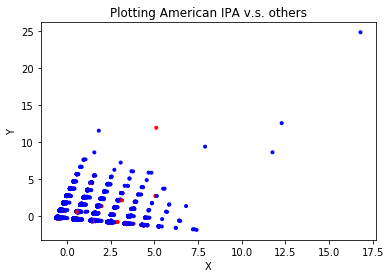

In [123]:
import matplotlib.pyplot as plt
x =X_train_pca[:,0]  
y =X_train_pca[:,1] 
C=[0]*50000
for i in range(50000):
    if data[i]['beer/style']== 'American IPA':
        C[i]=1
fig = plt.figure()  
ax1 = fig.add_subplot(111)  

ax1.set_title('Plotting American IPA v.s. others')  
plt.xlabel('X')  
plt.ylabel('Y')  

cValue = []
for i in C:
    if i==1:
        cValue.append('r')
    else:
        cValue.append('b')

ax1.scatter(x,y,c=cValue,marker='.')   
plt.show() 